# Homework #4: Numerically Solving Systems of Equations
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 2/20/2020|

In this notebook, we will attempt to numerically solve the following system of equations:

\begin{align*}
x_1^2 + x_1x_2 &= 10\\
x_2 + 3x_1x_2^2 &= 57
\tag{1}
\end{align*}

That is, we wish to find the values of $x_1$ and $x_2$ such that they simultaneously satisfy both equations.

## 1. Graphical Analysis

Before we attempt a numerical solution, let's first plot both equations in the $x_1$-$x_2$ plane to get a rough idea of where the possible solution may lie&mdash;i.e., the intersection of both lines through some point $(x_1, x_2)$.

We can define two functions, $f_1$ and $f_2$, both in terms of $x_1$, by solving each equation for $x_2$.

\begin{align*}
x_1^2 + x_1x_2 &= 10\\
x_1x_2 &= 10 - x_1^2\\
f_1(x_1) = x_2 &= \frac{10 - x_1^2}{x_1}
\tag{2}
\end{align*}

Using the quadractic formula for the second equation:
\begin{align*}
(3x_1)x_2^2 + (1)x_2 - 57 &= 0\\
x_2 &= \frac{-1 \pm \sqrt{1^2 -4(3x_1)(-57)}}{2(3x_1)}\\
f_2(x_1) = x_2 &= \frac{\pm\sqrt{1 + 684x_1}-1}{6x}
\tag{3}
\end{align*}

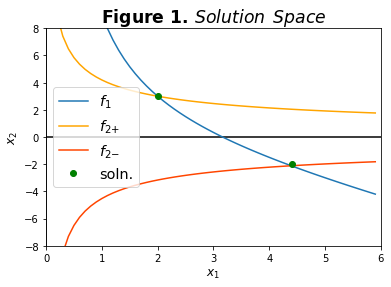

In [60]:
import matplotlib.pyplot as plt
import numpy as np

f1 = lambda x: (10.-x*x)/x
f2p = lambda x: (np.sqrt(1.+684*x)-1)/6./x # positive soln.
f2m = lambda x: (-np.sqrt(1.+684*x)-1)/6./x # negative soln
x = np.arange(.1, 6, .1)

plt.figure()
plt.title(r'Figure 1. $Solution \hspace{.5} Space$', fontsize='xx-large', fontweight='bold')
plt.xlabel(r'$x_1$', fontsize='large')
plt.xlim(0, 6)
plt.ylabel(r'$x_2$', fontsize='large')
plt.ylim(-8, 8)
plt.axvline(color='k')
plt.axhline(color='k')
plt.plot(x, f1(x), label='$f_1$')
plt.plot(x, f2p(x), color='orange', label='$f_{2\plus}$')
plt.plot(x, f2m(x), color='orangered', label='$f_{2\minus}$')
plt.plot(2, 3, 'o', color='green', label='soln.')
plt.plot(4.4, -2, 'o', color='green')
plt.legend(loc='best', fontsize='x-large')
plt.show()

As seen in Fig. 1, we expect to find solutions around $(2, 3)$ and $(4.4, -2)$.

## 2. Newton–Raphson Method

We can use the ***Newton–Raphson method*** to solve Eq. 1 or any _N_ systems of nonlinear equations, with _N_ unknowns:

\begin{equation}
f_{i}(x_{1}, x_{2},\dots, x_{N})=0, \quad i=1,2,....,N
\end{equation}

And for Eq. 1:

\begin{equation}
{\bf f}=\left[ \begin{array}{c} f_{1} \\ f_{2}  \end{array}\right] = \left[ \begin{array}{c} x_{1}^2+x_{1}x_{2}-10 \\ x_{2}+3x_{1}x_{2}^2-57 \end{array}\right] = 0
\tag{4}
\end{equation}

As with the Newton–Raphson method in general, we begin with an initial guess reasonably close to the true solution(s) then make a correction using its tangent line, i.e.,

\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})=0, \quad i=1,2
\end{equation}

Expanding as a Taylor series,

\begin{equation}
\approx f_{i}(x_{1},x_{2})+\frac{\partial f_{i}}{\partial x_{1}}\Delta x_{1}+\frac{\partial f_{i}}{\partial x_{2}}\Delta x_{2}=0, \quad i=1,2
\end{equation}

Expressing this first-order approximation in matrix form,

\begin{equation}
\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] + \begin{bmatrix} \dfrac{\partial f_{1}}{\partial x_{1}} & \dfrac{\partial f_{1}}{\partial x_{2}}  \\ \dfrac{\partial f_{2}}{\partial x_{1}} & \dfrac{\partial f_{2}}{\partial x_{2}} \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] = 0
\tag{5}
\end{equation}

or

\begin{equation}
\mathbf{J} \mathbf{\Delta x} = -\mathbf{f},
\tag{6}
\end{equation}

where $\mathbf{J}$ is the _Jacobian matrix_.

***RESUME HERE***

For $2$ × $2$ array,
\begin{equation}
 \begin{bmatrix} a & b \\c & d \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =-\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] 
\end{equation}
The solution is
\begin{eqnarray}
\Delta x_1=\frac{bf_2-df_1}{ad-bc}\\
\Delta x_1=\frac{cf_1-af_2}{ad-bc}
\end{eqnarray}

If we expand the Taylor series of a function $f(x)$ at some small _forward_ step $\delta$ away from an arbitrary $x_0$, we find

\begin{equation}
f(x_0 + \delta) = f(x_0) + \delta\frac{df(x_0)}{dx} + \frac{\delta^2}{2!}\frac{d^2f(x_0)}{dx^2} + \frac{\delta^3}{3!}\frac{df^3(x_0)}{dx^3} + \cdots.
\tag{2}
\end{equation}

Subtracting the first term on the right-hand side (RHS), $f(x_0)$, from both sides, and dividing both sides by $\delta$, yields

\begin{equation}
\frac{f(x_0 + \delta) - f(x_0)}{\delta} =  \frac{df(x_0)}{dx} + \frac{\delta}{2!}\frac{d^2f(x_0)}{dx^2} + \frac{\delta^2}{3!}\frac{df^3(x_0)}{dx^3} + \cdots.
\tag{3}
\end{equation}

Ignoring second-order and higher terms on the RHS, we arrive at the prescription for the numerical _forward difference_ derivative scheme at $x=x_0$:

\begin{equation}
\frac{df(x_0)}{dx}\biggr\rvert_{fd} \equiv \frac{f(x_0+\delta)-f(x_0)}{\delta}.
\tag{4}
\end{equation}

In the limit as $\delta \rightarrow 0$, for any $x$, we in fact come to the elementary definition of the derivative in calculus:

\begin{equation}
\frac{df(x)}{dx} \equiv \lim_{\delta \rightarrow 0} \frac{f(x+\delta)-f(x)}{\delta}.
\end{equation}

Let's now define a function for Eq. 4.

In [1]:
def derivfd(func, x0, dx=0.1):
    """
    Find the first derivative of a function at a point.
    
    Given a function, use a forward difference formula with spacing `dx` to compute the 1st derivative at `x0`.
    
    Parameters
    ----------
    func : function
        Input function.
    x0 : float
        The point at which `n`-th derivative is found.
    dx : float, optional
        Spacing.
    """
    return (func(x0+dx)-func(x0))/dx

We can visualize how this approximation works below in Figure 1.

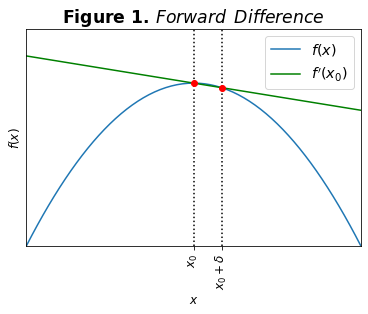

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: -.5*x**2 + 3*x + 3
x0 = 3
dx = 0.5
m = derivfd(f, x0, dx)
b = f(x0) - m*x0
df = lambda x: m*x + b
x = np.arange(0, 8, 0.1)
ticks = [x0, x0+dx]
labels = ['$x_0$', '$x_0 + \delta$']

plt.figure()
plt.title(r'Figure 1. $Forward \hspace{.5} Difference$', fontsize='xx-large', fontweight='bold')
plt.xlabel(r'$x$', fontsize='large')
plt.xlim(0, 6)
plt.ylabel(r'$f(x)$', fontsize='large')
plt.ylim(3, 9)
plt.yticks([])
plt.axvline(3, color='k', ls=':')
plt.axvline(3.5, color='k', ls=':')
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), 'g', label='$f^\prime(x_0)$')
plt.plot(x0, f(x0), 'or')
plt.plot(x0+dx, f(x0+dx), 'or')
plt.xticks(ticks, labels, fontsize='large', rotation='vertical')
plt.legend(loc='best', fontsize='x-large')
plt.show()

As shown, we approximate the derivative $f^\prime$ at $x_0$ by the straight line that goes through the points $(x_0, f(x_0))$ and $(x_0 + \delta, f(x_0 + \delta))$.

Let see how this scheme qualitatively fares with $f(x) = \sin{x}, \quad-\pi < x < \pi$.

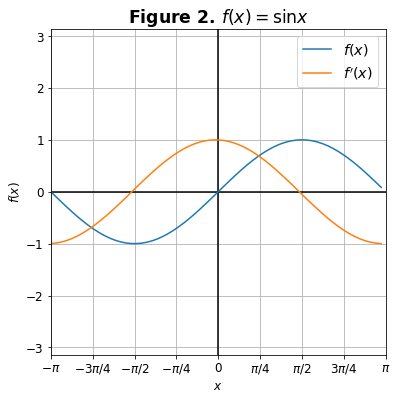

In [3]:
import numpy as np
import matplotlib.pyplot as plt

sin = lambda x: np.sin(x)
x = np.arange(-np.pi, np.pi, 0.1)

xticks = np.arange(-np.pi, np.pi+np.pi/4, np.pi/4)
xlabels = [r'$-\pi$',r'$-3\pi/4$',r'$-\pi/2$',
           r'$-\pi/4$',0,r'$\pi/4$',
           r'$\pi/2$',r'$3\pi/4$',r'$\pi$']

plt.figure(figsize=[6,6])
plt.title(r'Figure 2. $f(x) = \sinx$', fontsize='xx-large', fontweight='bold')
plt.xlabel(r'$x$', fontsize='large')
plt.xlim(-np.pi,np.pi)
plt.xticks(xticks, xlabels, fontsize='large')
plt.ylabel(r'$f(x)$', fontsize='large')
plt.ylim(-np.pi, np.pi)
plt.yticks(fontsize='large')
plt.axhline(color='k')
plt.axvline(color='k')
plt.grid()
plt.plot(x, sin(x), label='$f(x)$')
plt.plot(x, derivfd(sin, x), label='$f^\prime(x)$')
plt.legend(loc='best', fontsize='x-large')
plt.show()

At least at this graphical level, it seems to be pretty good.

### Error Analysis
The _absolute error_ of a numerical, or computational, result is defined as

\begin{equation}
\Delta \equiv |f_{th} - f_c|,
\tag{5}
\end{equation}

where $x_{th}$ and $x_c$ are the theoretical-expected and computed values respectively. We can evaluate $\Delta$ for the forward difference scheme as a function of interval spacing $dx$. Analytically, we know the derivative of $\cos x$ to be $-\sin x$. So, from Eq. 1, we know the exact form for $x=\frac{\pi}{4}$ to be

\begin{equation}
f_{th} = f^\prime\left(\frac{\pi}{4}\right) = -\sin\left(\frac{\pi}{4}\right) = -\frac{\sqrt{2}}{2}.
\tag{6}
\end{equation}

Let's use this to calculate and plot the error for $dx = 10^{-n}$, $n=1,2,...,15,16.$

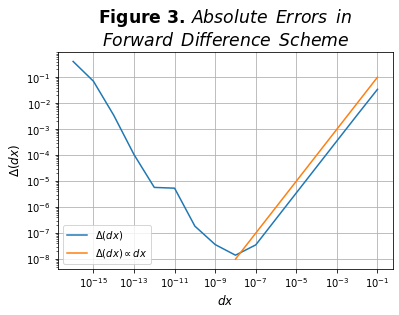

In [4]:
f = lambda x: np.cos(x)
x0 = np.pi/4
fth = -np.sqrt(2)/2
n = 17
dxs = []
deltas = np.zeros((n-1))
epsilons = np.zeros((n-1))

for i in range(1,n):
    dx = 10**(-i)
    dxs.append(dx)
    deltas[i-1] = abs(fth - derivfd(f, x0, dx))
    epsilons[i-1] = deltas[i-1]/abs(fth)
    
    
plt.figure()
plt.title('Figure 3. $Absolute \hspace{.5} Errors \hspace{.5} in \hspace{.5} $\n$ Forward \hspace{.5} Difference \hspace{.5} Scheme$', fontsize='xx-large', fontweight='bold')
plt.xlabel(r'$dx$', fontsize='large')
plt.xscale('log')
plt.ylabel(r'$\Delta(dx)$', fontsize='large')
plt.yscale('log')
plt.grid()
plt.plot(dxs, deltas, label='$\Delta(dx)$')
plt.plot(dxs[0:8], dxs[0:8], label='$\Delta(dx) \propto dx$')
plt.legend(loc='best')
plt.show()

Fig. 3 shows the _optimal value_ for the spacing $dx$ (i.e., yields the most precise result) to be around $10^{-8}$, where the trend in errors due to _round-off_ and _truncation_ roughly equal one another and are at a minimum. If we look back at Eq. 3, those second-order and higher terms in the Taylor series expansion we ignored amount to the error in $f^\prime_{fd}$. Namely, if

\begin{equation}
\frac{df}{dx}\biggr\rvert_{fd} = \frac{df}{dx} + \frac{\delta}{2!}\frac{d^2f}{dx^2} + \frac{\delta^2}{3!}\frac{df^3}{dx^3} + \cdots,
\end{equation}

then the _truncation_ error $\epsilon_{app}$, due to the first-order approximation made in the forward difference scheme, is

\begin{equation}
\epsilon^{fd}_{app} = \frac{\delta}{2}\frac{d^2f}{dx^2} + \frac{\delta^2}{6}\frac{df^3}{dx^3} + \cdots.
\tag{7}
\end{equation}

More roughly $\epsilon^{fd}_{app} \propto \delta$, or, in "Big O notation,"

\begin{equation}
\mathcal{O}(\delta),
\tag{8}
\end{equation}

assuming $f(x)$ has a second-order derivative. With $\delta = dx$, this behavior is exactly what we see in Fig. 3 (plotted in orange) for the forward difference error for the derivative of $\cos x$.

Although the truncation or approximation error $\epsilon^{fd}_{app}$ decreases linearly with smaller $\delta$ (or $dx$), _round-off_ errors $\epsilon_{ro}$ in turn _increase_ as ***subtractive cancelation*** begins to dominate, as we can see in the RHS of Eq. 4. The most precise calculation, therefore, occurs when $\epsilon_{app} + \epsilon_{ro}$ is at a minimum&mdash;generally when 

\begin{equation}
\epsilon_{ro} \simeq \epsilon_{app}.
\tag{9}
\end{equation}

Looking at the RHS of Eq. 4, we can estimate the round-off error by replacing the difference in the numerator by the machine precision $\epsilon_m$ (as $\delta$ reaches $\epsilon_m$) to get

\begin{equation}
\epsilon_{ro} \simeq \frac{\epsilon_m}{\delta}.
\tag{10}
\end{equation}

For the forward difference scheme, plugging $\epsilon^{fd}_{app} \simeq \delta f''/2$ and Eq. 10 into Eq. 9, we find

\begin{align*}
\frac{\epsilon_m}{\delta} &\simeq \frac{\delta f''}{2}\\
\delta^2_{min} &\simeq \frac{2\epsilon_m}{f''}
\end{align*}

For $f(x) = \cos x$, we can approximate $f' \approx f''$, and assuming double precision, $\epsilon_m \simeq 10^{-15}$, we get

\begin{align*}
\delta_{min} &\simeq 4 \times 10^{-8},\\
\epsilon^{fd}(\delta_{min}) \simeq \frac{\epsilon_m}{\delta_{min}} &\simeq 3 \times 10^{-8},
\end{align*}

which is in good agreement with Fig. 3.

## 2. Central Difference Scheme

Instead of taking a single step $\delta$ forward, we can form a _central difference_ by taking half-steps backwards and forwards. Thus, we can update the forward difference definition in Eq. 4 as

\begin{equation}
\frac{df(x_0)}{dx}\biggr\rvert_{cd} \equiv \frac{f(x_0+\delta/2)-f(x_0 - \delta/2)}{\delta}.
\tag{11}
\end{equation}


In [5]:
def derivcd(func, x0, dx=0.1):
    """
    Find the first derivative of a function at a point.
    
    Given a function, use a central difference formula with spacing `dx` to compute the 1st derivative at `x0`.
    
    Parameters
    ----------
    func : function
        Input function.
    x0 : float
        The point at which `n`-th derivative is found.
    dx : float, optional
        Spacing.
    """
    return (func(x0+dx/2)-func(x0-dx/2))/dx

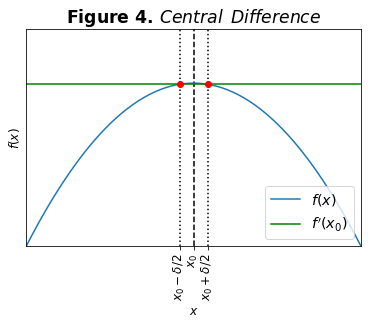

In [6]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: -.5*x**2 + 3*x + 3
x0 = 3
dx = 0.5
m = derivcd(f, x0, dx)
b = f(x0 - dx/2) - m*(x0 - dx/2)
df = lambda x: m*x + b
x = np.arange(0, 8, 0.1)
ticks = [(x0 - dx/2), x0, (x0 + dx/2)]
labels = ['$x_0 - \delta/2$', '$x_0$', '$x_0 + \delta/2$']

plt.figure()
plt.title(r'Figure 4. $Central \hspace{.5} Difference$', fontsize='xx-large', fontweight='bold')
plt.xlabel(r'$x$', fontsize='large')
plt.xlim(0, 6)
plt.ylabel(r'$f(x)$', fontsize='large')
plt.ylim(3, 9)
plt.yticks([])
plt.axvline(x0, color='k', ls='--')
plt.axvline((x0 - dx/2), color='k', ls=':')
plt.axvline((x0 + dx/2), color='k', ls=':')
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), 'g', label='$f^\prime(x_0)$')
plt.plot((x0 - dx/2), f(x0 - dx/2), 'or')
plt.plot((x0 + dx/2), f(x0 + dx/2), 'or')
plt.xticks(ticks, labels, fontsize='large', rotation='vertical')
plt.legend(loc='lower right', fontsize='x-large')
plt.show()

Even in this simple demonstration, we see the central difference scheme is more accurate than the forward difference scheme when $x_0$ is at the vertex of a parabola.

### Error Analysis

We can estimate the truncation error in using the central difference method by first expanding as a Taylor series both terms in the difference of the numerator in the RHS side of Eq. 11.

\begin{align*}
f\left(x + \frac{\delta}{2}\right) &= f(x) + \frac{\delta}{2}f'(x) + \frac{\delta^2}{8}f''(x) + \frac{\delta^3}{48}f'''(x) + \cdots\\
f\left(x - \frac{\delta}{2}\right) &= f(x) - \frac{\delta}{2}f'(x) + \frac{\delta^2}{8}f''(x) - \frac{\delta^3}{48}f'''(x) + \cdots\\
f\left(x + \frac{\delta}{2}\right) - f\left(x - \frac{\delta}{2}\right) &= \delta f'(x) + \frac{\delta^3}{24}f'''(x) + \cdots
\end{align*}

The difference leaves only the odd-powered $\delta$ terms. Dividing by $\delta$, we find

\begin{equation}
\frac{df(x)}{dx}\biggr\rvert_{cd} = f'(x) + \frac{\delta^2}{24}f'''(x) + \cdots.
\tag{12}
\end{equation}

Thus, compared to the forward difference, Eq. 8, this scheme is accurate to order $\mathcal{O}(\delta^2)$. This also explains why the derivative is _exact_ in Fig. 4, since the third-order derivative $f'''(x)$&mdash;and higher terms&mdash;in the truncation error vanish for a quadratic (second-order) polynomial.

Following the same methods&mdash;Eqs. 9 - 10&mdash;for the forward difference, we can estimate the minimum value of the central difference error and its corresponding step size $\delta$. From Eqs. 9, 10 and 12,

\begin{align*}
\epsilon^{cd}_{app} \simeq \frac{\delta^2}{24}f''' &\simeq \frac{\epsilon_m}{\delta}\\
\delta^3_{min} &\simeq \frac{24\epsilon_m}{f'''} 
\end{align*}

Again approximating $f' \approx f'' \approx f'''$ for $f(x) = \cos x$, and assuming double precision, we get

\begin{align*}
\delta_{min} &\simeq 3 \times 10^{-5}\\
\epsilon^{cd}(\delta_{min}) &\simeq 3 \times 10^{-11}.
\end{align*}

This means that the central difference scheme should be about 1000 times more accurate than the forward difference, with a 1000 times larger step size! 

Now, let's verify this computationally.

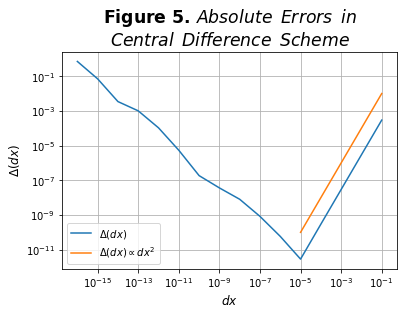

In [7]:
f = lambda x: np.cos(x)
x0 = np.pi/4
fth = -np.sqrt(2)/2
n = 17
dxs = []
deltas = np.zeros((n-1))
epsilons = np.zeros((n-1))

for i in range(1,n):
    dx = 10**(-i)
    dxs.append(dx)
    deltas[i-1] = abs(fth - derivcd(f, x0, dx))
    epsilons[i-1] = deltas[i-1]/abs(fth)
    
    
plt.figure()
plt.title('Figure 5. $Absolute \hspace{.5} Errors \hspace{.5} in \hspace{.5} $\n$ Central \hspace{.5} Difference \hspace{.5} Scheme$', fontsize='xx-large', fontweight='bold')
plt.xlabel(r'$dx$', fontsize='large')
plt.xscale('log')
plt.ylabel(r'$\Delta(dx)$', fontsize='large')
plt.yscale('log')
plt.grid()
plt.plot(dxs, deltas, label='$\Delta(dx)$')
plt.plot(dxs[0:5], np.asarray(dxs[0:5])**2, label='$\Delta(dx) \propto dx^2$')
plt.legend(loc='best')
plt.show()

## 3. Central Difference Revisited

Let's try the central difference scheme again, but this time at $x=0$.

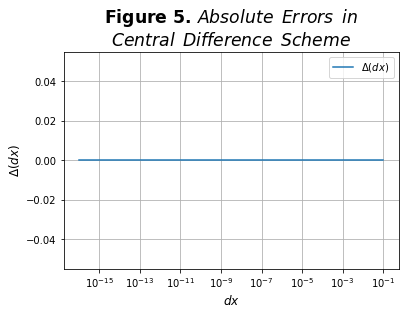

In [8]:
f = lambda x: np.cos(x)
x0 = 0
fth = 0
n = 17
dxs = []
deltas = np.zeros((n-1))
epsilons = np.zeros((n-1))

for i in range(1,n):
    dx = 10**(-i)
    dxs.append(dx)
    deltas[i-1] = abs(fth - derivcd(f, x0, dx)) 
    
plt.figure()
plt.title('Figure 5. $Absolute \hspace{.5} Errors \hspace{.5} in \hspace{.5} $\n$ Central \hspace{.5} Difference \hspace{.5} Scheme$', fontsize='xx-large', fontweight='bold')
plt.xlabel(r'$dx$', fontsize='large')
plt.xscale('log')
plt.ylabel(r'$\Delta(dx)$', fontsize='large')
plt.grid()
plt.plot(dxs, deltas, label='$\Delta(dx)$')
plt.legend(loc='best')
plt.show()

How can this be? Let's go back to Eq. 12:

\begin{equation}
\frac{df(x)}{dx}\biggr\rvert_{cd} = f'(x) + \frac{\delta^2}{24}f'''(x) + \cdots.
\end{equation}

Analytically, we know

\begin{align*}
f(0) &= \cos(0) = 1\\
f'(0) &= -\sin(0) = 0\\
f''(0) &= -\cos(0) = -1\\
f'''(0) &= \sin(0) = 0\\
f^{(4)}(0) &= \cos(0) = 1\\
f^{(5)}(0) &= -\sin(0) = 0
\end{align*}

Thus, Eq. 12 becomes

\begin{align*}
\frac{df(x)}{dx}\biggr\rvert_{cd} = -\sin(x) + \frac{\delta^2}{24}\sin(x) + \cdots.
\end{align*}

And, more importantly, if we evaluate the error analytically at $x=0$, we find

\begin{align*}
\epsilon^{cd}_{app}\big\rvert_{x=0} &= \frac{\delta^2}{24}f'''(0) + \frac{\delta^4}{1920}f^{(5)}(0) + \cdots\\
&= 0.
\end{align*}

Since every odd-ordered derivative of $f(0)$ is zero (i.e., $\pm\sin(0)$), the error in the central difference scheme when evaluated for $x=0$ is simply zero&mdash;perfect precision for $\cos(0)$.